#Breast Cancer Classification Prediction

In [77]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/breast-cancer-wisconsin.data 2.txt', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [78]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion',
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

df.columns = col_names
df.head(10)

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [79]:
#drop ID colums
df.drop(['Id'], axis=1, inplace=True)
df.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_Size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [81]:
#convert a feature to numeric

df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce') #this will convert all non-numeric values into NaN

df.info() #you will now see it convert Dtype into float

## now check missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_Cell_Size         699 non-null    int64  
 2   Uniformity_Cell_Shape        699 non-null    int64  
 3   Marginal_Adhesion            699 non-null    int64  
 4   Single_Epithelial_Cell_Size  699 non-null    int64  
 5   Bare_Nuclei                  683 non-null    float64
 6   Bland_Chromatin              699 non-null    int64  
 7   Normal_Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [82]:
#Checking for missing values
df.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [83]:
df.describe(include='all')

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [84]:
df['Bare_Nuclei'].value_counts()

Bare_Nuclei
1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: count, dtype: int64

##### **NOTE:**

* when we see the value one very large and other are similar to each other this mean that there is outlier
* When there is outlier, we will use the 'MEDIAN' instead of 'MEAN' to replace the missing values

In [85]:
#Replace missing values with median

import numpy as np
df['Bare_Nuclei'].replace(np.nan, df['Bare_Nuclei'].median(), inplace=True)
df['Bare_Nuclei'].value_counts()

Bare_Nuclei
1.0     418
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: count, dtype: int64

In [88]:
#Checking the Class count for each category
df['Class'].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

#### How to know the Data Are Imbalance?
* So we visualized the distribution using the bar chart/histogram

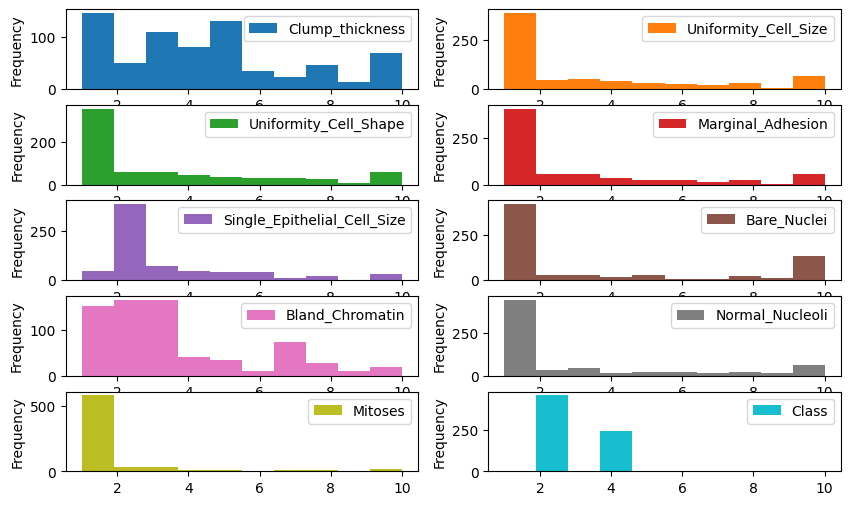

In [89]:
from pickle import BINSTRING
import matplotlib.pyplot as plt

#histogram

plt.rcParams['figure.figsize'] = (10, 6)
df.plot(kind='hist', bins=10, subplots=True, sharey=False, layout=(5,2), sharex=False)
plt.show()

In [90]:
df.corr()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Uniformity_Cell_Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Uniformity_Cell_Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal_Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single_Epithelial_Cell_Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare_Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Bland_Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Normal_Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


In [91]:
correlation = df.corr()

correlation['Class'].sort_values(ascending=False)

Class                          1.000000
Bare_Nuclei                    0.818968
Uniformity_Cell_Shape          0.818934
Uniformity_Cell_Size           0.817904
Bland_Chromatin                0.756616
Clump_thickness                0.716001
Normal_Nucleoli                0.712244
Marginal_Adhesion              0.696800
Single_Epithelial_Cell_Size    0.682785
Mitoses                        0.423170
Name: Class, dtype: float64

In [92]:
df.columns

Index(['Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape',
       'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [93]:
#Define feature X (Predictor)
X = df[['Clump_thickness', 'Uniformity_Cell_Size','Uniformity_Cell_Shape', 'Marginal_Adhesion','Single_Epithelial_Cell_Size',
        'Bare_Nuclei', 'Bland_Chromatin','Normal_Nucleoli', 'Mitoses']].values

type(X)

numpy.ndarray

In [94]:
#define y (predicted values)

y = df['Class'].values

In [95]:
df.describe()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


#### Dividing the data into test-train

In [100]:
#Function ni similar to test-train data splitting
from sklearn.model_selection import train_test_split

#if you mention train_size = 0.8 (80%)
#if you mention test_size = 0.2 (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)#random state parameter to reshuffle dataset randomly assigned 80% train and 20% test
#the number 42 is just a inside joke in the data science communities

print (X_train.shape)
print (X_test.shape)

(559, 9)
(140, 9)


In [101]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train[:5] #This part boleh skip

array([[ 0.16488604, -0.38317451, -0.76069772, -0.64250678, -0.55496377,
        -0.69889302, -0.18320521, -0.60149186, -0.34972397],
       [ 0.16488604, -0.05465526, -0.09627581,  0.40562928, -0.55496377,
         0.113334  , -0.18320521,  0.39230306, -0.34972397],
       [-1.23695875, -0.71169376, -0.76069772, -0.29312809, -0.55496377,
        -0.69889302, -0.18320521, -0.60149186, -0.34972397],
       [ 0.16488604, -0.71169376, -0.76069772, -0.64250678, -0.55496377,
        -0.69889302, -0.58640093, -0.60149186, -0.34972397],
       [-0.88649755, -0.71169376, -0.09627581, -0.29312809, -0.55496377,
        -0.69889302, -0.58640093, -0.60149186, -0.34972397]])

In [102]:
#predict

from sklearn.neighbors import KNeighborsClassifier

#the default parameter for KNeighborsClassifier() is 5 for if you want to change it you have to add the parameter
#KNeighborsClassifier(N=3)
neigh = KNeighborsClassifier()

#training
neigh.fit(X_train, y_train)

#prediction
y_hat = neigh.predict(X_test)

#evaluation
#here will use the accuracy score test
from sklearn.metrics import accuracy_score # import accuracy_score from sklearn.metrics
print('The accuracy is: ', (accuracy_score(y_test, y_hat))*100)

The accuracy is:  97.14285714285714


[0.93571429 0.92142857 0.97142857 0.96428571 0.97142857 0.95714286
 0.97142857 0.97142857 0.97142857]




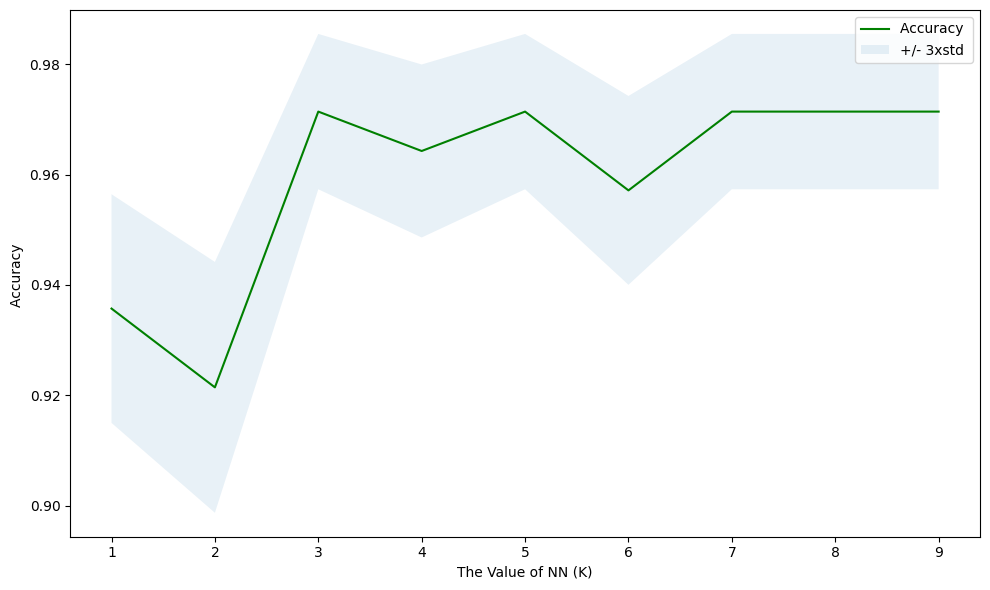



The best accuracy was with 0.9714285714285714 with k= 3


In [105]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

Ks =10 #change the k value here, then the loop will start
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

#print (mean_acc) (activate code ni kalau nak semua mean)
print(mean_acc)

print ('')
print ('')

#this is to plot the data
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('The Value of NN (K)')
plt.tight_layout()
plt.show()

print ('')
print ('')

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [111]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_hat)

print('The confusion matrix is= ', cm)

print('')

print ('TP is ', cm[0][0])
print ('TN is ', cm[1][1])
print ('FP is ', cm[0][1])
print ('FN is ', cm[1][0])

The confusion matrix is=  [[94  1]
 [ 3 42]]

TP is  94
TN is  42
FP is  1
FN is  3


* The correct prediction is TP and TN, which means 94 + 42 = 136, and the incorrect prediction is FP and FN, which means 1 + 3 = 4
* High TP,TN and low FP,FN indicate better model performance

#### Check the over fitting
* over fitting kadang tu sebab not enough sample for to fit in the model

In [113]:
#Method 1:
print(' The accuracy based in training set is: ', accuracy_score(y_train, neigh.predict(X_train)))
print(' The accuracy based in test set is: ', accuracy_score(y_test, neigh.predict(X_test)))

 The accuracy based in training set is:  0.9695885509838998
 The accuracy based in test set is:  0.9714285714285714


In [116]:
#Method 2:
print(' The accuracy based in training set is: ', neigh.score(X_train,y_train))
print(' The accuracy based in test set is: ', neigh.score(X_test, y_test))

 The accuracy based in training set is:  0.9695885509838998
 The accuracy based in test set is:  0.9714285714285714


The results you provided show that the accuracy on the training set is approximately 96.96%, and the accuracy on the test set is approximately 97.14%. In this case, the test set accuracy being slightly higher than the training set accuracy is not unusual and does not necessarily indicate a problem.

In [118]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           2       0.97      0.99      0.98        95
           4       0.98      0.93      0.95        45

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140



**Precision:** it the relationship (ratio) of corretly predicted positive (TP) to the total prediction of positive (TP + FP)</p>
TP/ (TP + FP) (how confused is the model about the right prediction / how well known the model into getting the right answer)

**Recall:** TP / (TP + FN) (how good the model in recalling the right answer, the right prediction)

**Think of it this way:**

* Precision: Out of all the times the model predicted a positive result, how many were actually correct? Focuses on minimizing false positives.

* Recall: Out of all the actual positive instances, how many did the model correctly identify? Focuses on minimizing false negatives.

* Precision: How good are you at NOT making mistakes when you find someone? (Not yelling "Found you!" when no one is there.)

* Recall: How good are you at finding ALL the people hiding?